# Questions:
 - Which brand holds the most value vs mileage?
 - Which model is holds the most value regardless of mileage and age?
 - Which brand depreciates the most in the first 5 years?
 - Price difference per state.
 - Which cars should you go for to get the best value?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')
sns.set_palette(palette='Set1')
sns.set_style("darkgrid")

In [2]:
cars = pd.read_csv('Data/vehicles.csv')

In [72]:
cars.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,7240372487,7240309422,7240224296,7240103965,7239983776
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-201...,https://auburn.craigslist.org/cto/d/auburn-200...,https://auburn.craigslist.org/cto/d/lanett-tru...,https://auburn.craigslist.org/cto/d/auburn-200...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,35990,7500,4900,2000,19500
year,2010,2014,2006,1974,2005
manufacturer,chevrolet,hyundai,bmw,chevrolet,ford
model,corvette grand sport,sonata,x3 3.0i,c-10,f350 lariat
condition,good,excellent,good,good,excellent


In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458168 entries, 0 to 458212
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458168 non-null  int64  
 1   year          457128 non-null  float64
 2   manufacturer  439959 non-null  object 
 3   model         453332 non-null  object 
 4   condition     265249 non-null  object 
 5   cylinders     287054 non-null  object 
 6   fuel          454941 non-null  object 
 7   odometer      402878 non-null  float64
 8   title_status  455601 non-null  object 
 9   transmission  455736 non-null  object 
 10  drive         324005 non-null  object 
 11  size          136853 non-null  object 
 12  type          345455 non-null  object 
 13  paint_color   317349 non-null  object 
 14  description   458108 non-null  object 
 15  state         458168 non-null  object 
 16  posting_date  458150 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [75]:
cars.region.unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [6]:
cars.drop(columns=['Unnamed: 0','id', 'url', 'region_url','VIN', 'image_url', 'lat', 'long', 'region'], inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458213 entries, 0 to 458212
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458213 non-null  int64  
 1   year          457163 non-null  float64
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  description   458143 non-null  object 
 15  state         458213 non-null  object 
 16  posting_date  458185 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [198]:
cars.drop_duplicates(subset = ['description'], inplace=True)

In [9]:
pd.DataFrame(100*cars.isnull().sum()/len(cars), columns=['NaN%'])

,NaN%
price,0.000000
year,0.226991
manufacturer,3.974306
model,1.055508
condition,42.106607
cylinders,37.347436
fuel,0.704327
odometer,12.067626
title_status,0.560275
transmission,0.530810


In [10]:
cars['age'] = 2021 - cars.year

In [11]:
cars.state.unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [12]:
cars.title_status.unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [13]:
cars = cars[cars.title_status!='parts only']

In [14]:
cars.manufacturer.unique()

array(['chevrolet', 'hyundai', 'bmw', 'ford', 'toyota', 'jeep', 'ram',
       nan, 'honda', 'dodge', 'lexus', 'mercedes-benz', 'cadillac', 'gmc',
       'subaru', 'infiniti', 'mazda', 'mini', 'nissan', 'volkswagen',
       'kia', 'lincoln', 'mitsubishi', 'buick', 'audi', 'rover',
       'chrysler', 'fiat', 'acura', 'volvo', 'pontiac', 'tesla', 'saturn',
       'mercury', 'datsun', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'harley-davidson', 'land rover', 'aston-martin', 'morgan',
       'hennessey'], dtype=object)

In [15]:
cars.loc[cars.manufacturer == 'rover','manufacturer'] = 'land rover'

In [16]:
cars.dropna(subset=['year','title_status','manufacturer'], inplace=True)

# EDA

As somebody that has been looking to buy cars several times in my life, I know that some people (mostly dealerships) post cars with an extremely low price so their posts appear regardless of the filters you apply in your search, or they post the downpayment as the price. To take care of this, we'll apply our own little filter, that is, we want to drop all rows that have a newer car with a price below certain price threshold.

Let's see what the best threshold might be:

In [17]:
cars.describe()

,price,year,odometer,age
count,4.376060e+05,437606.000000,3.877530e+05,437606.000000
mean,4.102104e+04,2010.975233,1.011829e+05,10.024767
std,8.381865e+06,8.409192,3.290815e+06,8.409192
min,0.000000e+00,1900.000000,0.000000e+00,0.000000
25%,4.988000e+03,2008.000000,4.100000e+04,5.000000
50%,1.099500e+04,2013.000000,8.763600e+04,8.000000
75%,2.105000e+04,2016.000000,1.340000e+05,13.000000
max,3.615215e+09,2021.000000,2.043756e+09,121.000000


We have outliers in price and odometer, we can visualize this better with a boxplot:

<AxesSubplot:>

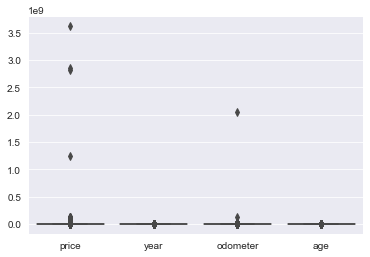

In [18]:
sns.boxplot(data=cars)

We'll drop those that are above `$500,000`, those below `$100`, and those 500,000 miles:

In [19]:
cars = cars[cars.odometer<500000]

In [27]:
cars = cars[cars.price<500000]
cars = cars[cars.price>100]

In [28]:
cars[cars.year>2010].describe()

,price,year,odometer,age
count,233664.000000,233664.000000,233664.000000,233664.000000
mean,21116.800594,2015.183105,70632.136063,5.816895
std,13799.652408,2.561610,48740.005804,2.561610
min,101.000000,2011.000000,0.000000,0.000000
25%,11380.000000,2013.000000,31158.750000,4.000000
50%,17995.000000,2015.000000,62913.000000,6.000000
75%,28900.000000,2017.000000,102002.000000,8.000000
max,384995.000000,2021.000000,490000.000000,10.000000


Here we see our IQR for cars from 2011 or newer is between `$8800` and `$27K`. 

In [29]:
cars[(cars.year>2000) & (cars.year<2011)].describe()

,price,year,odometer,age
count,106166.000000,106166.000000,106166.000000,106166.000000
mean,7819.238033,2006.548452,139795.486719,14.451548
std,6558.229560,2.560948,56134.575601,2.560948
min,101.000000,2001.000000,0.000000,11.000000
25%,3900.000000,2005.000000,106000.000000,12.000000
50%,5995.000000,2007.000000,140000.000000,14.000000
75%,9500.000000,2009.000000,174000.000000,16.000000
max,200000.000000,2010.000000,498888.000000,20.000000


Here we see our IQR for cars from 2001 to 2010 is between `$3500` and `$9000`. 

In [30]:
cars[(cars.year>1900) & (cars.year<2000)].describe()

,price,year,odometer,age
count,15525.000000,15525.000000,15525.000000,15525.000000
mean,9991.987118,1987.987375,124590.218551,33.012625
std,13434.136375,14.118653,78584.649312,14.118653
min,123.000000,1911.000000,0.000000,22.000000
25%,2800.000000,1984.000000,67512.000000,23.000000
50%,5500.000000,1994.000000,120000.000000,27.000000
75%,12000.000000,1998.000000,178000.000000,37.000000
max,389500.000000,1999.000000,493487.000000,110.000000


Here we see our IQR for cars from 1900 to 1999 is between `$2600` and `$12500`. 

In [31]:
cars[(cars.year>=1910) & (cars.year<=1949)].describe()

,price,year,odometer,age
count,395.000000,395.000000,395.000000,395.000000
mean,24931.792405,1937.445570,27581.784810,83.554430
std,16752.654109,7.707136,37868.955093,7.707136
min,700.000000,1911.000000,0.000000,72.000000
25%,13250.000000,1931.000000,686.500000,79.000000
50%,23500.000000,1938.000000,6000.000000,83.000000
75%,32950.000000,1942.000000,47326.000000,90.000000
max,123456.000000,1949.000000,200000.000000,110.000000


Interestinlgy, we can see how the IQR for cars from 1910 to 1949 is `$8500` to `$29500`. This is because most of this cars are classics, so people tend to restore them.

So, for our threshold, let's iterate over every year and plot the 25% quantile:

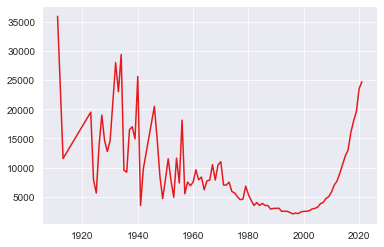

In [32]:
price_quantile={}
for year in np.sort(cars.year.unique()):
    price_quantile[year] = cars[cars.year == year].price.quantile(q=0.25)
plt.plot(pd.Series(price_quantile));

We can see how the quantile grahp becomes more uniform around 1980, starts to drop consistenly until around 1995 where takes the form of a growing exponential curve.

That being said, I think using this curve as our price threshold to eliminate false prices is going to yield the best results. Let's implement it:

In [34]:
df = pd.DataFrame()
for year in np.sort(cars.year.unique()):
    price = int(cars[cars.year == year].price.quantile(q=0.25))
    df = df.append(cars[(cars.year== year)&(cars.price>= price)])

In [35]:
df.reset_index(drop=True, inplace=True)
cars = df.copy()

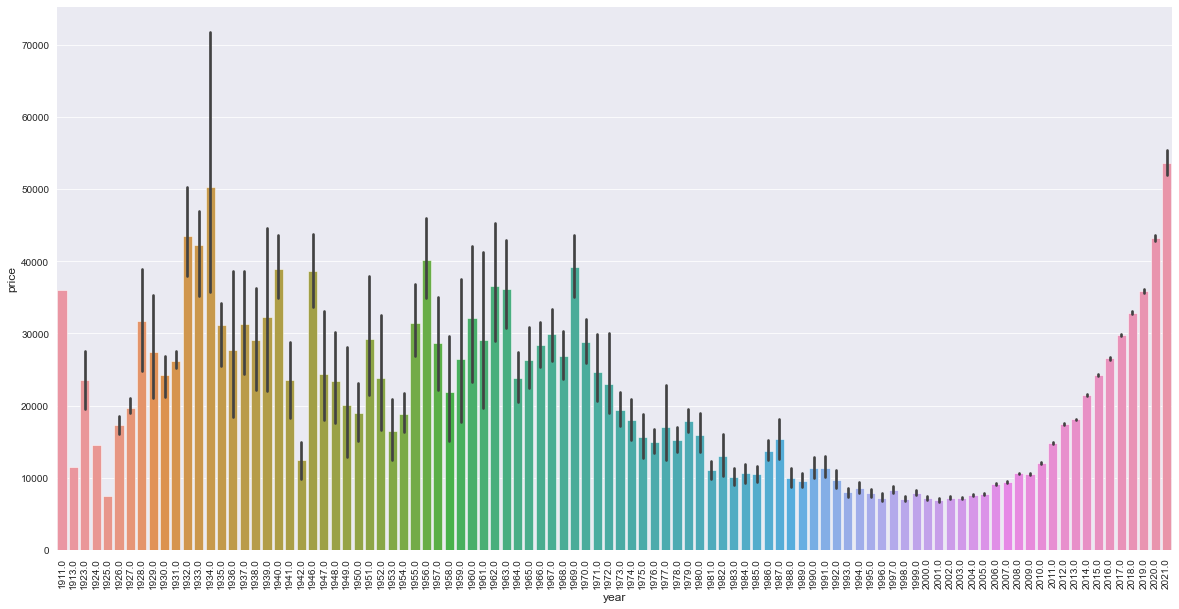

In [36]:
plt.figure(figsize=(20,10))
sns.barplot(x=cars.year, y=cars.price, data=cars)
plt.xticks(rotation=90)
plt.show()

Right around 1990, cars start to reappreciate. Let's look at the relation between age and mileage:

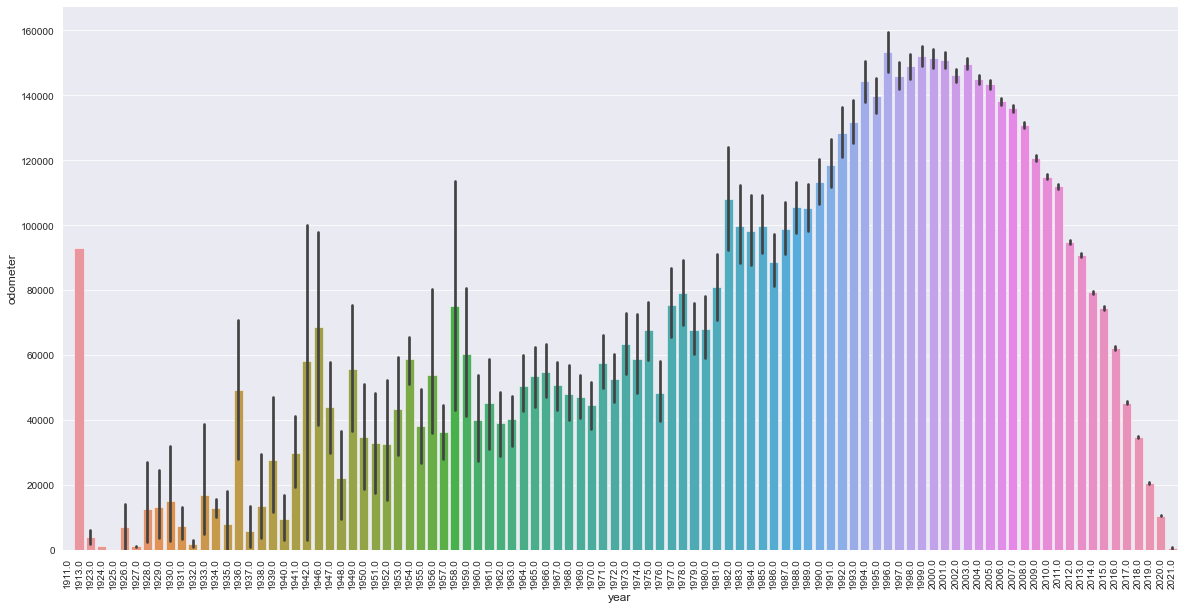

In [38]:
plt.figure(figsize=(20,10))
sns.barplot(x=cars.year, y=cars.odometer, data=cars)
plt.xticks(rotation=90)
plt.show()

Let's overlap them:

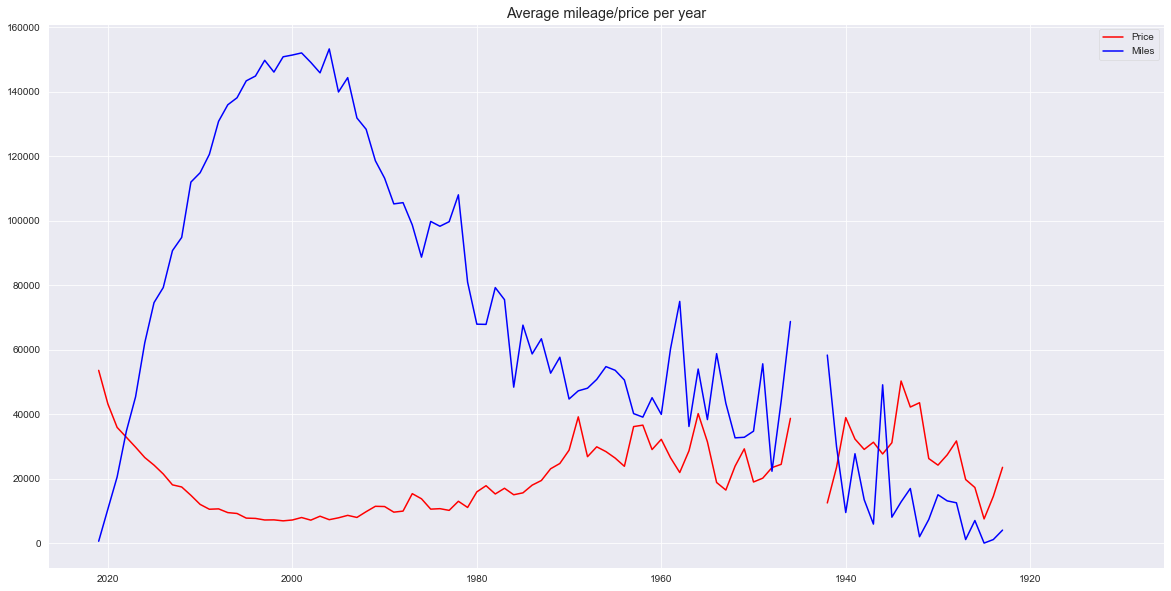

In [39]:
price_year = {}
odometer_year = {}
for i in range(1910, 2022):
    price_year[i] = cars[cars.year== i].price.mean()
    odometer_year[i] = cars[cars.year== i].odometer.mean()
    
plt.figure(figsize=(20,10))    
plt.plot(pd.DataFrame(pd.Series(price_year)), 'r', label='Price')
plt.plot(pd.DataFrame(pd.Series(odometer_year)), 'b', label = 'Miles')

plt.title('Average mileage/price per year')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

We can see where the mileage starts to reduce right around 1995, and stays below 100K miles before 1980. This is reasonable because, most likely, any car that was driven more than 100k miles has either been restored, has a newer engine and transmission, or is sitting in a junkyard.

We can also see how both graph are negatively correlated, and they both follow the same trend.

We will have some outliars at the top end, but there are some expensive cars, however, those cars are collectables and are rarely driven, therefore, the mileage should be extremily low. Let's check:|

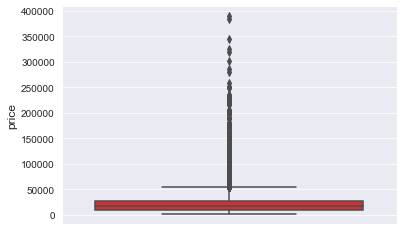

In [40]:
sns.boxplot(y=cars.price)
plt.show()

In [41]:
cars[(cars.price>100000)].describe()

,price,year,odometer,age
count,284.000000,284.000000,284.000000,284.000000
mean,153137.176056,2012.609155,24557.193662,8.390845
std,51163.501346,14.122335,40344.368386,14.122335
min,101951.000000,1934.000000,0.000000,0.000000
25%,117347.000000,2014.000000,1500.000000,2.000000
50%,129995.000000,2017.500000,7276.500000,3.500000
75%,179986.500000,2019.000000,27405.000000,7.000000
max,389500.000000,2021.000000,230000.000000,87.000000


There are indeed some outliers. We can see our IQR lies between 1500 and 27405 miles. Let's explore our last quartile:

In [42]:
cars[(cars.price>100000)&(cars.odometer>27405)].count()

price           66
year            66
manufacturer    66
model           63
condition       46
cylinders       42
fuel            64
odometer        66
title_status    66
transmission    65
drive           39
size            26
type            47
paint_color     47
description     66
state           66
posting_date    66
age             66
dtype: int64

There are only 66 observations.

In [43]:
cars[(cars.price>100000)&(cars.odometer>27405)].manufacturer.unique()

array(['mercedes-benz', 'jaguar', 'chevrolet', 'ford', 'ferrari',
       'porsche', 'ram', 'gmc', 'cadillac', 'dodge', 'lexus', 'toyota',
       'bmw', 'honda', 'subaru', 'buick', 'jeep', 'land rover'],
      dtype=object)

I am fairly confident `Honda` does not have any model that goes for more that $100K...

In [44]:
cars[(cars.price>100000)&(cars.odometer>27405)&(cars.manufacturer == 'toyota')]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,age
99208,151078,2011.0,toyota,avalon limited,excellent,6 cylinders,gas,151078.0,clean,automatic,fwd,full-size,sedan,silver,This is the Limited 2011 Toyota Avalon. Excel...,ks,2020-11-30T11:28:17-0600,10.0
114798,129000,2012.0,toyota,highlander,excellent,6 cylinders,gas,139000.0,clean,automatic,4wd,NaN,NaN,silver,* PLEASE!!!! LOOK BEFORE YOU CALL >>> * MORE P...,in,2020-11-21T09:39:02-0600,9.0


These are definitely typos. Most likely it's the same case with `Toyota`, `Chevrolet`, `Ram`, `Ford`, etc.

In [45]:
outliers = ['land rover', 'porsche', 'mercedes-benz', 'ram', 'gmc', 'ford',
       'lexus', 'jaguar', 'buick', 'chevrolet', 'ferrari', 'toyota',
       'bmw', 'honda', 'dodge', 'cadillac', 'jeep', 'subaru']
for outlier in outliers:
    print(cars.loc[(cars.price>100000)&(cars.odometer>27405)&(cars.manufacturer == outlier),['price','year','odometer','model', 'manufacturer']])
    print('________________________________________________________')

         price    year  odometer model manufacturer
233865  129985  2018.0   29244.0   NaN   land rover
235498  129985  2018.0   29244.0   NaN   land rover
________________________________________________________
         price    year  odometer          model manufacturer
2201    110000  1977.0   66000.0      911 turbo      porsche
2204    179888  1977.0   42000.0      930 turbo      porsche
3596    124500  1987.0   29397.0            911      porsche
3597    118800  1987.0   43408.0            911      porsche
4768    129900  1991.0   68968.0  911 turbo/965      porsche
178349  129777  2015.0   28250.0    911 turbo s      porsche
192045  108900  2016.0   42388.0            911      porsche
192667  108900  2016.0   42388.0            911      porsche
234486  145000  2018.0   28000.0      911 turbo      porsche
________________________________________________________
         price    year  odometer                model   manufacturer
588     139000  1959.0   35792.0  benz 190sl roadst

There are a few with a price of `123456`, `111111`, `234567`, clearly not real so we'll drop those. Most of them can be saved by dividing  by 10. The only correct ones are: `benz 190sl roadster`, all `porsche`, the `jaguar`, all `ferrari` and the `i8`:

In [47]:
cars = cars[~((cars.price == 123456) | (cars.price == 234567) | (cars.price == 111111) | (cars.price == 12345) | (cars.price == 1234) | (cars.price == 11111) | (cars.price == 123456))]



cars.loc[(cars.price>100000) &
    (cars.odometer>27405)&((cars.manufacturer == 'honda')|
    (cars.manufacturer=='cadillac') | (cars.manufacturer=='ford') | (cars.manufacturer=='gmc') |
    (cars.manufacturer=='jeep') | (cars.manufacturer== 'subaru') | (cars.manufacturer=='dodge') |
    (cars.manufacturer== 'toyota') | (cars.manufacturer=='buick') | 
    (cars.manufacturer=='lexus') | (cars.manufacturer=='ram') | ((cars.manufacturer=='bmw')&(cars.model == '335xi')) | 
    ((cars.manufacturer=='chevrolet')&(cars.model != 'covertte')) |  
    ((cars.manufacturer=='mercedes-benz')&(cars.model != 'benz 190sl roadster')) ),'price'] = cars.loc[(cars.price>100000) &
    (cars.odometer>27405)&((cars.manufacturer == 'honda')|
    (cars.manufacturer=='cadillac') | (cars.manufacturer=='ford') | (cars.manufacturer=='gmc') |
    (cars.manufacturer=='jeep') | (cars.manufacturer== 'subaru') | (cars.manufacturer=='dodge') |
    (cars.manufacturer== 'toyota') | (cars.manufacturer=='buick') | 
    (cars.manufacturer=='lexus') | (cars.manufacturer=='ram') | ((cars.manufacturer=='bmw')&(cars.model == '335xi')) | 
    ((cars.manufacturer=='chevrolet')&(cars.model != 'covertte')) |  
    ((cars.manufacturer=='mercedes-benz')&(cars.model != 'benz 190sl roadster')) ), 'price']/10

cars = cars[~((cars.manufacturer == 'land rover')&(cars.price>100000) &(cars.odometer>27405))]

In [48]:
cars.reset_index( drop=True, inplace=True)

Now let's see the average price vs the average mileage vs average price in 2020 for each brand to try and answer our first question:

### Which brand holds the most value vs mileage?

In [49]:
cars_s = cars.groupby(by='manufacturer').mean().sort_values(by='price',ascending=True).index

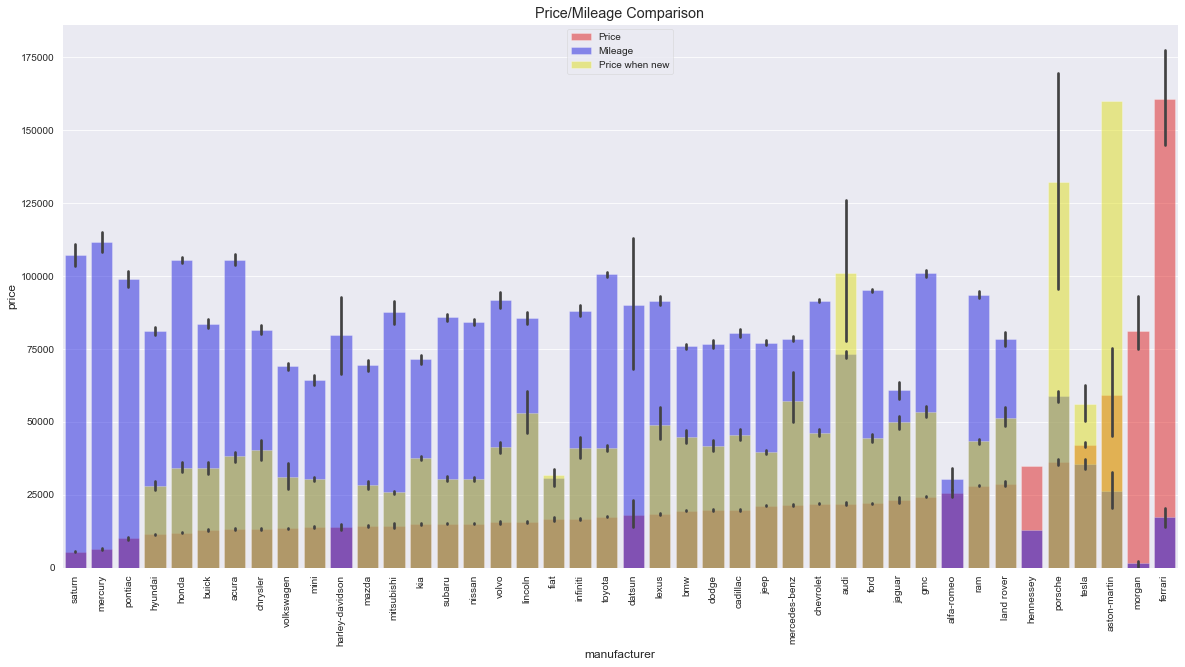

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x="manufacturer", y="price", data=cars,order=cars_s, color='red', label='Price',alpha = 0.5)
sns.barplot(x="manufacturer", y="odometer", data=cars,order=cars_s, color='blue', label='Mileage', alpha = 0.5)
sns.barplot(x="manufacturer", y="price", data=cars[cars.year==2020],order=cars_s, color='yellow', label='Price when new', alpha = 0.5)
plt.legend()
plt.title("Price/Mileage Comparison")
plt.xticks(rotation=90)
plt.show()

We are missing the yellow bar for some of the manufacturers, however, these manufacturers are not that common and won't really affect our analysis. Here we are looking and the highest blue bar with the red bar as close as possible to the yellow bar. This might be hard to do visually, so let's use numbers:

We can see how much value, on average, each brand loses per mile driven.

In [65]:
((cars[cars.year==2020].groupby(by='manufacturer').price.mean()-cars.groupby(by='manufacturer').price.mean())/cars.groupby(by='manufacturer').odometer.mean()).sort_values()

manufacturer
mitsubishi         0.129781
ram                0.161887
subaru             0.180624
nissan             0.181218
hyundai            0.204184
mazda              0.204199
honda              0.210796
toyota             0.234009
ford               0.235749
acura              0.236927
jeep               0.238813
volkswagen         0.251319
buick              0.253701
mini               0.256571
chevrolet          0.265713
infiniti           0.275135
volvo              0.280223
dodge              0.288154
gmc                0.288706
land rover         0.288721
kia                0.317935
cadillac           0.321587
chrysler           0.332831
bmw                0.333881
lexus              0.334921
tesla              0.387116
lincoln            0.434560
jaguar             0.436574
mercedes-benz      0.455764
fiat               0.487469
audi               1.083513
porsche            1.632233
aston-martin       3.818330
alfa-romeo              NaN
datsun                  NaN
ferrari

This is very interesting. `Mitsubishi` holds the most value on average, followed by `Ram` (that's a surprise). You definitely do not want to buy a `Porsche` or `Aston Martin` if you mind losing about `$1.6` and `$3.8` respectively.

### Which brand depreciates the most in the first 5 years?

In [68]:
price_year = {}
df = pd.DataFrame()
for i in cars.manufacturer.unique():
    for x in range(6):
        price_year[2020-x]= cars[(cars.manufacturer == i)&(cars.year ==2020-x)].price.mean()
    df[i]= pd.Series(price_year, index=[2020,2019,2018,2017,2016,2015])



In [112]:
df = df.T

In [108]:
df['depreciation'] = 100-100*df[2015]/df[2020]

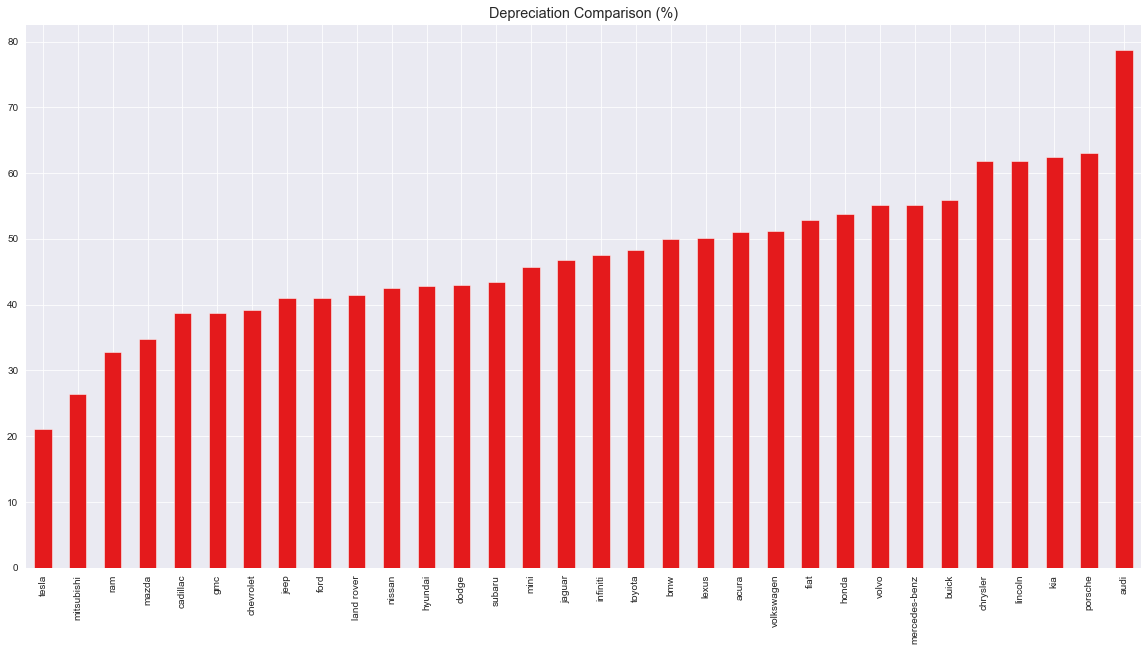

In [126]:
df.loc['depreciation',:].dropna().sort_values().plot(kind='bar',figsize=(20,10))
plt.title("Depreciation Comparison (%)")
plt.show()

A few interesting things to note:
 - `Kia` is the third brand that depreciates the most, right after high tier brands such as `Prosche` and `Audi`.
 - `Teslas` seems to depreciate the least in terms of years, but keep in mind that most teslas in this dataset have less than 50,000 miles.
 - `Mitsubishi` and `Ram` are still the two best brands in terms of holding value.
 - `Honda` loses over 50% of it's value, even though it is amongst the best brands in terms of value lost per miles... Maybe people don't like older Hondas? or maybe the rate at which they lose value is higher the first 5 years, after which they hit a plateau and hold their value?
 - Same applies for `Subaru`, `Hyundai`, and `Toyota` but to at around 10% less. 

### Which model is holds the most value regardless of mileage and age?

First let's start by looking at what we are working with. Usually the 'model' section of the description is left for the seller to type in the model rather than giving them a drop-down selection menu. This makes it easier for typos and sellers adding more than it's necessary.

In [167]:
len(cars.model.unique())

18504

18504 unique values!!! Let's see how they are distributed:

In [251]:
cars.loc[:,'model'].value_counts().head(500).index

Index(['f-150', 'silverado 1500', '1500', 'silverado', 'wrangler', 'camry',
       'accord', 'tacoma', 'grand cherokee', 'explorer',
       ...
       'camaro ss', 'xt5 luxury sport', 'tacoma double cab trd pro', 'f550',
       'ilx', 'e-series cargo', 's4', 'e-class e 550', 'hr-v',
       'focus se hatchback 4d'],
      dtype='object', length=500)

Right off the bat we can see we have `f150` and `f-150`, `silverado 1500` and `silverado`, `sierra` and `sierra 1500`, etc.

In [ ]:
for model in cars.model.unique():
    
    print(re.search(model, list(cars.model.unique())))

In [267]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
l = []

for model in cars.model.dropna().unique():
    l.append(model)
process.extract('silverado', l, scorer=fuzz.WRatio)


[('silverado', 100),
 ('c20 silverado', 95),
 ('silverado k10', 95),
 ('silverado c20', 95),
 ('silverado c30', 95)]

In [256]:
fuzz.token_sort_ratio(cars.model.dropna().unique(), 'silverado')

15

In [272]:
def get_ratio(row):
    name = row['model']
    return fuzz.partial_token_sort_ratio(name, 'silverado')

cars[cars.apply(get_ratio, axis=1) > 77].sample(30, random_state=42)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,age
269225,29998.0,2020.0,chevrolet,silverado,NaN,NaN,gas,7315.0,clean,automatic,4wd,NaN,pickup,white,2020 Chevrolet Chevy Silverado 1500 Double Cab...,fl,2020-12-02T19:42:50-0500,1.0
237735,42000.0,2018.0,chevrolet,silverado 1500 z71,like new,8 cylinders,gas,44235.0,clean,automatic,4wd,full-size,pickup,red,"****FREE FOUR YEAR 48,000 MILE POWERTRAIN WARR...",id,2020-12-02T13:13:22-0800,3.0
7767,5700.0,1997.0,chevrolet,silverado 2500,good,8 cylinders,gas,188000.0,clean,automatic,rwd,full-size,truck,blue,7.4 engine. it's nicer for its age and runs st...,in,2020-11-16T11:40:30-0500,24.0
207651,41999.0,2017.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,29471.0,clean,automatic,4wd,NaN,truck,red,2017 Chevrolet Silverado 1500 4WD Crew Cab 153...,ak,2020-11-18T09:04:39-0900,4.0
199316,30000.0,2016.0,chevrolet,silverado 2500hd,excellent,NaN,gas,93000.0,clean,automatic,NaN,NaN,NaN,silver,"2016 Chevy Silverado 2500 HD truck. 93,000 mil...",nm,2020-12-02T14:29:12-0700,5.0
19229,10995.0,2002.0,chevrolet,silverado 2500hd ls crew cab short bed 4wd,NaN,NaN,gas,181628.0,clean,automatic,4wd,NaN,pickup,white,2002 Chevrolet Silverado 2500HD LS Crew Cab Sh...,nc,2020-11-29T16:48:02-0500,19.0
59657,22300.0,2007.0,chevrolet,silverado 2500hd clas,NaN,8 cylinders,diesel,215683.0,clean,automatic,4wd,NaN,truck,NaN,our number one priority is the health and safe...,wa,2020-11-03T15:51:10-0800,14.0
92189,11911.0,2010.0,chevrolet,silverado 1500,NaN,8 cylinders,gas,179737.0,clean,automatic,rwd,full-size,pickup,black,➥ You can immediately confirm availability of...,tx,2020-11-26T09:02:31-0600,11.0
42142,8200.0,2006.0,chevrolet,silverado,NaN,NaN,gas,158000.0,clean,automatic,NaN,NaN,NaN,NaN,"5.3 Liter, 158,000 Miles, 4x4, Runs Drives Gre...",ct,2020-12-02T08:58:55-0500,15.0
22862,5000.0,2003.0,chevrolet,silverado 2500hd 4x4,fair,8 cylinders,gas,285000.0,clean,automatic,4wd,NaN,truck,white,2003 Chevy Silverado 2500 with 6.0 ls. 4 wheel...,in,2020-11-29T15:56:02-0500,18.0


### Price difference per state

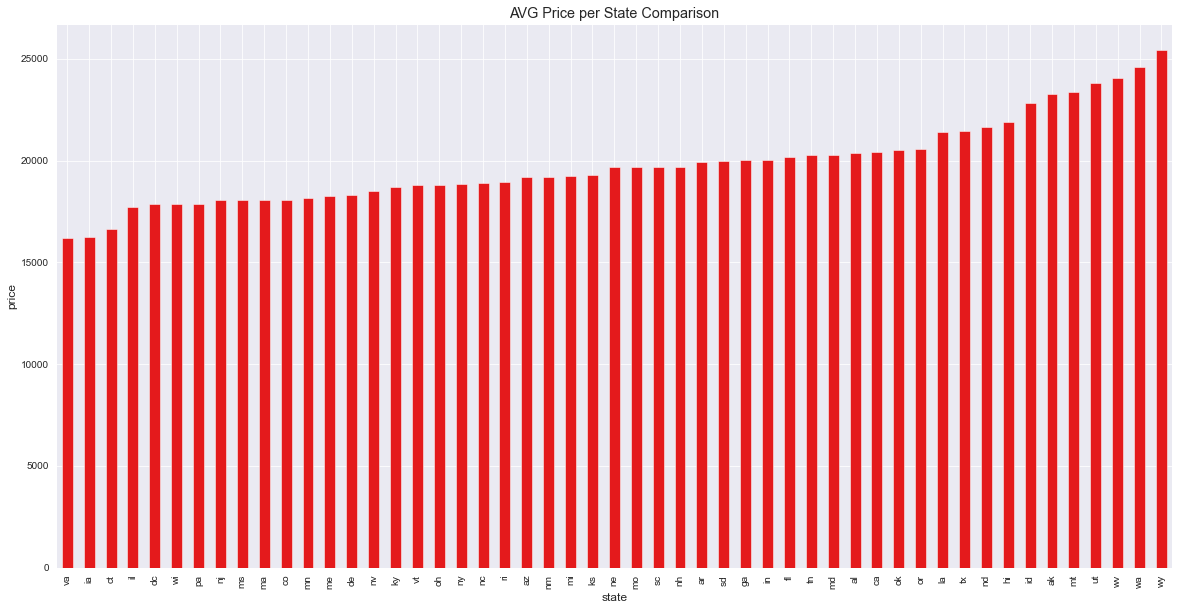

In [280]:
cars.groupby('state').price.mean().sort_values().plot(kind='bar',figsize=(20,10))
plt.title("AVG Price per State Comparison")
plt.ylabel('price')
plt.show()